# eda ecg

[INFO] Đang tải dữ liệu từ file ecg.csv...
[INFO] Kích thước tập dữ liệu: 4998 mẫu, 141 đặc trưng (bao gồm 140 điểm tín hiệu và 1 nhãn).
[INFO] Tổng số giá trị bị thiếu (NaN): 0

[INFO] Đang kiểm tra phân bố nhãn phân loại...
- Số lượng mẫu Bình thường (Nhãn 1.0): 2919
- Số lượng mẫu Bất thường (Nhãn 0.0): 2079


C:\Users\pikal\AppData\Local\Temp\ipykernel_3744\2773043195.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df [label_col], palette='Set2')


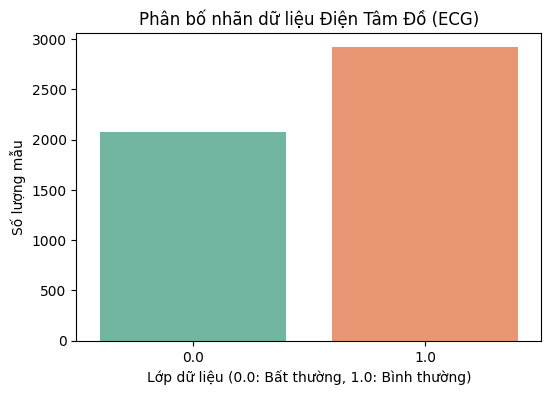


[INFO] Đang trực quan hóa các mẫu dữ liệu ngẫu nhiên...


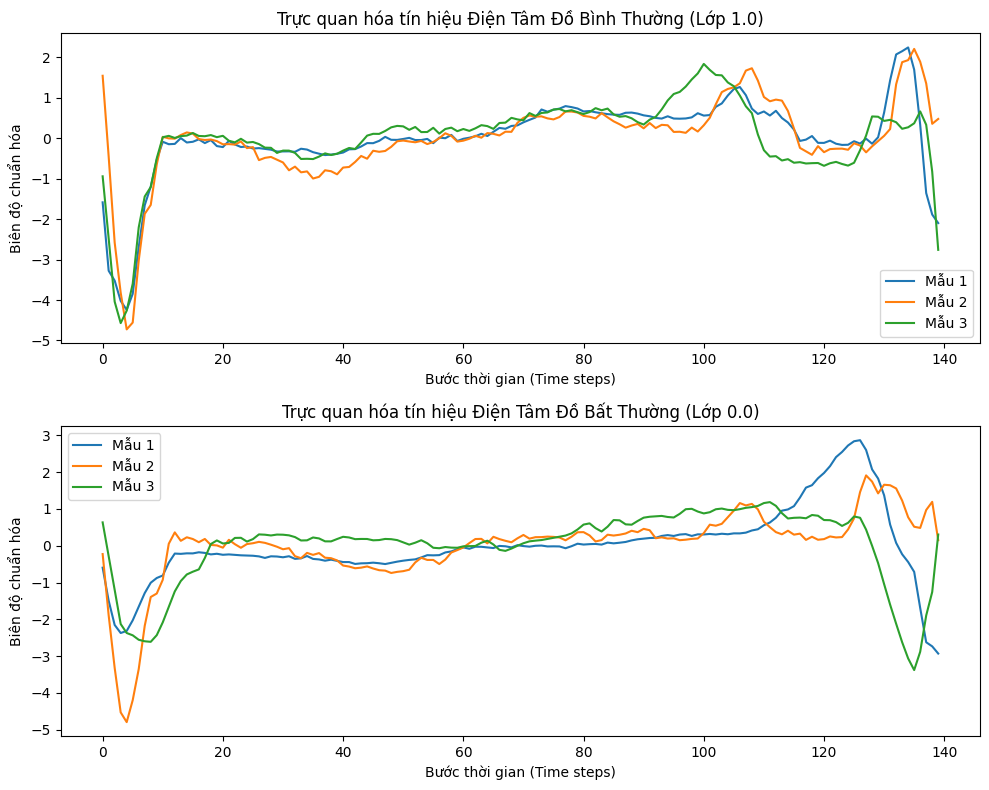


[INFO] Đang tính toán và trực quan hóa tín hiệu trung bình...

[INFO] Đang chạy PCA để phân cụm dữ liệu...


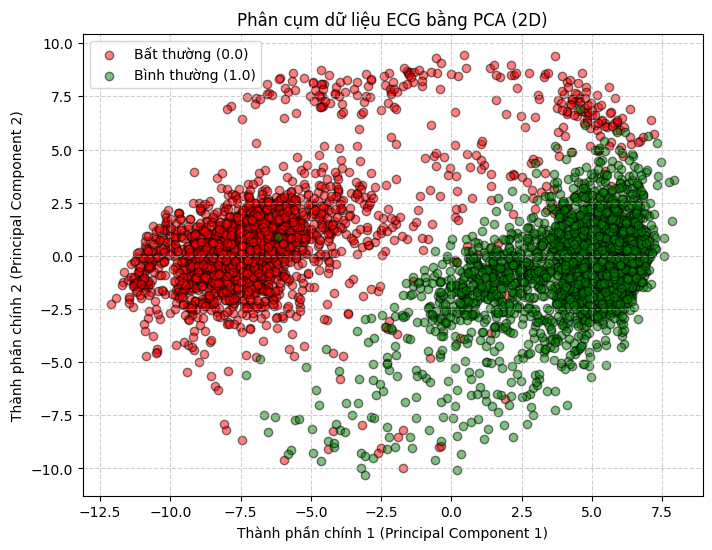


[INFO] Quá trình phân tích EDA hoàn tất.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. ĐỌC DỮ LIỆU VÀ KIỂM TRA TỔNG QUAN
# ==========================================
print("[INFO] Đang tải dữ liệu từ file ecg.csv...")
df = pd.read_csv('../data/raw/ecg.csv', header=None)

# Xác định cột nhãn (cột cuối cùng của tập dữ liệu)
label_col = df.columns[-1]

print(f"[INFO] Kích thước tập dữ liệu: {df.shape[0]} mẫu, {df.shape[1]} đặc trưng (bao gồm 140 điểm tín hiệu và 1 nhãn).")
missing_values = df.isnull().sum().sum()
print(f"[INFO] Tổng số giá trị bị thiếu (NaN): {missing_values}")

# ==========================================
# 2. KIỂM TRA PHÂN BỐ LỚP DỮ LIỆU (CLASS DISTRIBUTION)
# ==========================================
print("\n[INFO] Đang kiểm tra phân bố nhãn phân loại...")
class_counts = df[label_col].value_counts()
print(f"- Số lượng mẫu Bình thường (Nhãn 1.0): {class_counts[1]}")
print(f"- Số lượng mẫu Bất thường (Nhãn 0.0): {class_counts[0]}")

# Trực quan hóa phân bố nhãn
plt.figure(figsize=(6, 4))
sns.countplot(x= df [label_col], palette='Set2')
plt.title('Phân bố nhãn dữ liệu Điện Tâm Đồ (ECG)')
plt.xlabel('Lớp dữ liệu (0.0: Bất thường, 1.0: Bình thường)')
plt.ylabel('Số lượng mẫu')
plt.show()

# ==========================================
# 3. TRỰC QUAN HÓA CÁC MẪU DỮ LIỆU NGẪU NHIÊN
# ==========================================
print("\n[INFO] Đang trực quan hóa các mẫu dữ liệu ngẫu nhiên...")

# Lấy ngẫu nhiên 3 mẫu từ mỗi lớp, thiết lập random_state để kết quả cố định qua các lần chạy
normal_samples = df[df[label_col] == 1].sample(3, random_state=42).iloc[:, :-1]
abnormal_samples = df[df[label_col] == 0].sample(3, random_state=42).iloc[:, :-1]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Vẽ đồ thị cho lớp bình thường
for i in range(3):
    axes[0].plot(normal_samples.iloc[i].values, label=f'Mẫu {i+1}')
axes[0].set_title('Trực quan hóa tín hiệu Điện Tâm Đồ Bình Thường (Lớp 1.0)')
axes[0].set_xlabel('Bước thời gian (Time steps)')
axes[0].set_ylabel('Biên độ chuẩn hóa')
axes[0].legend()

# Vẽ đồ thị cho lớp bất thường
for i in range(3):
    axes[1].plot(abnormal_samples.iloc[i].values, label=f'Mẫu {i+1}')
axes[1].set_title('Trực quan hóa tín hiệu Điện Tâm Đồ Bất Thường (Lớp 0.0)')
axes[1].set_xlabel('Bước thời gian (Time steps)')
axes[1].set_ylabel('Biên độ chuẩn hóa')
axes[1].legend()

plt.tight_layout()
plt.show()

# ==========================================
# 4. SO SÁNH GIÁ TRỊ TÍN HIỆU TRUNG BÌNH CỦA HAI LỚP
# ==========================================
print("\n[INFO] Đang tính toán và trực quan hóa tín hiệu trung bình...")

# Tính giá trị trung bình theo từng cột (từng bước thời gian) cho mỗi lớp
class_1_mean = df[df[label_col] == 1].iloc[:, :-1].mean()
class_0_mean = df[df[label_col] == 0].iloc[:, :-1].mean()

# ==========================================
# 5. BONUS: GIẢM CHIỀU DỮ LIỆU VỚI PCA ĐỂ PHÂN CỤM
# ==========================================
print("\n[INFO] Đang chạy PCA để phân cụm dữ liệu...")
from sklearn.decomposition import PCA

# Lấy dữ liệu và nhãn
X = df.iloc[:, :-1].values
y = df[label_col].values

# Giảm từ 140 chiều xuống còn 2 chiều để vẽ hình phẳng
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Vẽ cái biểu đồ
plt.figure(figsize=(8, 6))
# Cụm bệnh (0.0)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', alpha=0.5, label='Bất thường (0.0)', edgecolors='k')
# Cụm khỏe (1.0)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='green', alpha=0.5, label='Bình thường (1.0)', edgecolors='k')

plt.title('Phân cụm dữ liệu ECG bằng PCA (2D)')
plt.xlabel('Thành phần chính 1 (Principal Component 1)')
plt.ylabel('Thành phần chính 2 (Principal Component 2)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n[INFO] Quá trình phân tích EDA hoàn tất.")